<a href="https://colab.research.google.com/github/brash99/phys441/blob/master/JupyterNotebooks/TravelingWaveConvection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convection in 1D

### The 1D Inviscid Burger's Equation

\begin{equation}
\frac{\partial u}{\partial t} - u \frac{\partial u}{\partial x} = 0
\end{equation}

Again, use the forward difference for the time derivative, and the backward difference approximation for the first order spatial derivative.

\begin{equation}
\frac{u_i^{n+1} -  u_i^n}{\Delta t} - u_i^n \left( \frac{u^n_{i} - u^n_{i-1}}{\Delta x} \right) = 0
\end{equation}

\begin{equation}
u_i^{n+1} =  u_i^n + \frac{\Delta t}{\Delta x} u^n_i \left( u^n_{i} - u^n_{i-1} \right)
\end{equation}

In [20]:
# Remember: comments in python are denoted by the pound sign
import numpy as np                            #here we load numpy
from matplotlib import pyplot as plt     #here we load matplotlib
import time, sys                         #and load some utilities

In [21]:
#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline                  

In [22]:
# We define the x-axis to start at x=0.0m and end at x=20.0m.
# 
# We specify the number of steps in x (nx), and the number
# of steps in t (nt), and calculate dx and dt based on these choices.

xrange = 20.0
trange = 12.0
nx = 401  # try changing this number from 41 to 81 and Run All ... what happens?
dx = xrange / (nx-1)
nt = 4810    #nt is the number of timesteps we want to calculate
dt = trange/ (nt-1)  #dt is the amount of time each timestep covers (delta t)

x = np.linspace(0,xrange,nx)

pulseShapeChoice = 1

In [23]:
# Set the wavefunction equal to all ones, initially
u = np.ones(nx)      #numpy function ones()

if (pulseShapeChoice == 1):
  # Test Case 1: Square Pulse
  u[int(0.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1
else:
  # Test Case 2:  Gaussian Pulse
  mu = 0.75
  sigma = 0.25
  for i in range(len(u)):
    u[i]=u[i]+np.exp(-1.0*(x[i]-mu)**2/sigma**2)


Integral =  11.0
412.0
401


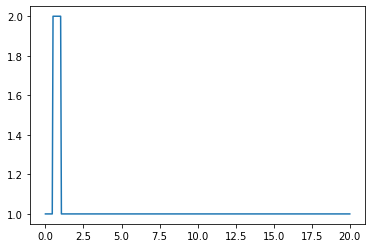

In [24]:
plt.plot(x, u)
print ("Integral = ",u.sum()-len(x))
print(u.sum())
print(len(x))

In [25]:
#un = np.ones(nx) #initialize a temporary array

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx): ## you can try commenting this line and...
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])

Integral =  7.909748114411855


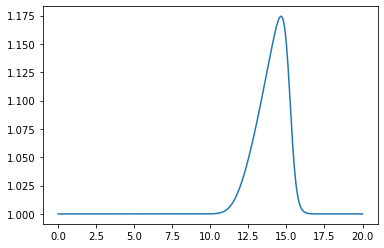

In [26]:
plt.plot(x, u)

print ("Integral = ",u.sum()-len(x))

0.5
Integral =  11.0
Integral =  -1.13270077182176
Integral =  -0.40476189453278266
Integral =  0.21515986197721304
Integral =  0.7463906909192701
Integral =  1.2037883714579607
Integral =  1.5992858279662414


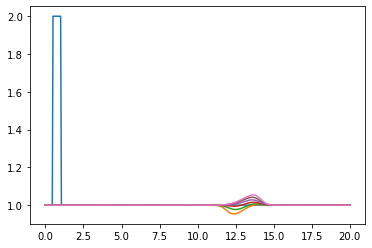

In [27]:
xrange = 20.0
trange = 12
nx = 401  # try changing this number from 41 to 81 and Run All ... what happens?
dx = xrange / (nx-1)
nt = 481    #nt is the number of timesteps we want to calculate
dt = trange/ (nt-1)  #dt is the amount of time each timestep covers (delta t)

print (dt/dx)

u = np.ones(nx)      #numpy function ones()
x = np.linspace(0, xrange, nx)

if (pulseShapeChoice == 1):
  # Test Case 1: Square Pulse
  u[int(0.5 / dx):int(1.0 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1
else:
  # Test Case 2:  Gaussian Pulse
  mu = 0.75
  sigma = 0.25
  for i in range(len(u)):
    u[i]=u[i]+np.exp(-1.0*(x[i]-mu)**2/sigma**2)

plt.plot(x, u)
print ("Integral = ",u.sum()-len(x))

for ntt in range(nt-3,nt+3):
  dt = trange/(ntt-1)
  u = np.ones(nx)      #numpy function ones()
  if (pulseShapeChoice == 1):
    u[int(0.5 / dx):int(1.0 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1
  else:
    for i in range(len(u)):
      u[i]=u[i]+np.exp(-1.0*(x[i]-mu)**2/sigma**2)
  for n in range(ntt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx): ## you can try commenting this line and...
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
  plt.plot(x, u)
  print ("Integral = ",u.sum()-len(x))

Integral =  -3.0297607253964998
Integral =  -1.9951281757558377
Integral =  -1.13270077182176
Integral =  -0.40476189453278266
Integral =  0.21515986197721304
Integral =  0.7463906909192701
Integral =  1.2037883714579607
Integral =  1.5992858279662414
Integral =  1.9427137234046654
Integral =  2.2422524682868357


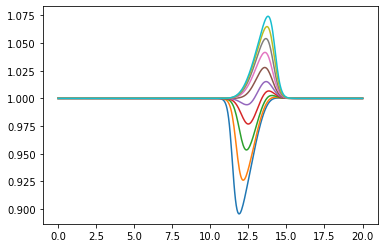

In [28]:
for ntt in range(nt-5,nt+5):
  dt = trange/(ntt-1)
  u = np.ones(nx)      #numpy function ones()
  if (pulseShapeChoice == 1):
    u[int(0.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1
  else:
    for i in range(len(u)):
      u[i]=u[i]+np.exp(-1.0*(x[i]-mu)**2/sigma**2)
  for n in range(ntt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx): ## you can try commenting this line and...
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
  plt.plot(x, u)
  print ("Integral = ",u.sum()-len(x))